In [ ]:
import io
import pandas as pd
from google.colab import files
import re

In [ ]:
uploaded = files.upload()

Saving pib_por_municipio.csv to pib_por_municipio.csv


In [ ]:
pib_por_municipio = pd.read_csv(io.BytesIO(uploaded.get('pib_por_municipio.csv')), sep=";", encoding='utf8')

In [ ]:
pib_por_municipio['PIB (MUNICIPIOS) 2016'] = pib_por_municipio['PIB (MUNICIPIOS) 2016'].astype(float)
print(pib_por_municipio.head())
print(len(pib_por_municipio))

   Cód  Provivincia  Geografía: Municipio ID         Municipio  \
0    1  ARABA/ALAVA                     1001  Alegría-Dulantzi   
1    1  ARABA/ALAVA                     1002           Amurrio   
2    1  ARABA/ALAVA                     1003           Aramaio   
3    1  ARABA/ALAVA                     1004        Artziniega   
4    1  ARABA/ALAVA                     1006           Armiñón   

   PIB (MUNICIPIOS) 2016  
0                1932.61  
1                8544.16  
2                2644.62  
3                1424.03  
4                 813.73  
84716


In [ ]:
uploaded = files.upload()

Saving poblacion_por_municipio_y_sexo.csv to poblacion_por_municipio_y_sexo.csv


In [ ]:
poblacion = pd.read_csv(io.BytesIO(uploaded.get('poblacion_por_municipio_y_sexo.csv')), sep=";", encoding='utf8')

In [ ]:
poblacion.insert(0, "codigo_provincia", 0, True)
poblacion.insert(1, "nombre_provincia", "", True)
poblacion.insert(28, "pib", 0.0, True)
poblacion['pib'] = poblacion['pib'].astype(float)

In [ ]:
poblacion.head()

codigo_provincia nombre_provincia  codigo_municipio     nombre_municipio  \
0                 0                               1051  Agurain/Salvatierra   
1                 0                               1001     Alegría-Dulantzi   
2                 0                               1002              Amurrio   
3                 0                               1049                Añana   
4                 0                               1003              Aramaio   

   mujeres_2023  hombres_2023  total_2023  despoblado_2023  mujeres_2018  \
0        2502.0        2583.0      5085.0            False        2521.0   
1        1436.0        1539.0      2975.0            False        1380.0   
2        5179.0        5134.0     10313.0            False        5211.0   
3          61.0          95.0       156.0             True          64.0   
4         677.0         732.0      1409.0             True         709.0   

   hombres_2018  ...  despoblado_2008  mujeres_2003  hombres_2003  total_2003  \
0        2497.0  ...            False        2045.0        1999.0      4044.0   
1        1507.0  ...            False         822.0         885.0      1707.0   
2        5075.0  ...            False        4812.0        4743.0      9555.0   
3          87.0  ...             True          88.0          97.0       185.0   
4         774.0  ...             True         700.0         789.0      1489.0   

   despoblado_2003  mujeres_1998  hombres_1998  total_1998  despoblado_1998  \
0            False        1936.0        1940.0      3876.0            False   
1             True         603.0         656.0      1259.0             True   
2            False        4899.0        4854.0      9753.0            False   
3             True          91.0          94.0       185.0             True   
4             True         644.0         721.0      1365.0             True   

   pib  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 29 columns]

In [ ]:
file_c = pib_por_municipio.copy()
print("ready")

ready


In [ ]:
for i in range(0, len(file_c)):
    municipio = file_c.loc[i, 'Geografía: Municipio ID']
    if municipio != 0:
      pib = float(file_c.loc[file_c['Geografía: Municipio ID'] == municipio, "PIB (MUNICIPIOS) 2016"].sum())
      poblacion.loc[poblacion['codigo_municipio'] == municipio,'codigo_provincia'] = file_c.loc[i, 'Cód']
      poblacion.loc[poblacion['codigo_municipio'] == municipio,'nombre_provincia'] = file_c.loc[i, 'Provivincia']
      poblacion.loc[poblacion['codigo_municipio'] == municipio,'pib'] = pib
    # asigno 0 al municipio al que ya le asigné el pbi
    file_c.loc[file_c["Geografía: Municipio ID"] == municipio, "Geografía: Municipio ID"] = 0
print("ready")

ready


In [ ]:
poblacion.to_csv('poblacion_por_municipio_sexo_y_pib.csv', index=False, sep=';', encoding='utf-8')

# Agrego geometry a los datos, para graficar algunos mapas

In [ ]:
import geopandas as gpd
!pip install mapclassify
import matplotlib.pyplot as plt
from mapclassify import classify

In [ ]:
uploaded = files.upload()

Saving poblacion_por_municipio_sexo_y_pib.csv to poblacion_por_municipio_sexo_y_pib (1).csv


In [ ]:
poblacion = pd.read_csv(io.BytesIO(uploaded.get('poblacion_por_municipio_sexo_y_pib (1).csv')), sep=";", encoding='utf-8')

In [ ]:
poblacion.dropna(inplace=True)
poblacion.insert(29, "geometry",None)

In [ ]:
poblacion.head()

codigo_provincia nombre_provincia  codigo_municipio     nombre_municipio  \
0                 1      ARABA/ALAVA              1051  Agurain/Salvatierra   
1                 1      ARABA/ALAVA              1001     Alegría-Dulantzi   
2                 1      ARABA/ALAVA              1002              Amurrio   
3                 1      ARABA/ALAVA              1049                Añana   
4                 1      ARABA/ALAVA              1003              Aramaio   

   mujeres_2023  hombres_2023  total_2023  despoblado_2023  mujeres_2018  \
0        2502.0        2583.0      5085.0            False        2521.0   
1        1436.0        1539.0      2975.0            False        1380.0   
2        5179.0        5134.0     10313.0            False        5211.0   
3          61.0          95.0       156.0             True          64.0   
4         677.0         732.0      1409.0             True         709.0   

   hombres_2018  ...  mujeres_2003  hombres_2003  total_2003  despoblado_2003  \
0        2497.0  ...        2045.0        1999.0      4044.0            False   
1        1507.0  ...         822.0         885.0      1707.0             True   
2        5075.0  ...        4812.0        4743.0      9555.0            False   
3          87.0  ...          88.0          97.0       185.0             True   
4         774.0  ...         700.0         789.0      1489.0             True   

   mujeres_1998  hombres_1998  total_1998  despoblado_1998        pib  \
0        1936.0        1940.0      3876.0            False  143866.25   
1         603.0         656.0      1259.0             True   54679.30   
2        4899.0        4854.0      9753.0            False  369739.43   
3          91.0          94.0       185.0             True    5715.80   
4         644.0         721.0      1365.0             True   19319.83   

   geometry  
0      None  
1      None  
2      None  
3      None  
4      None  

[5 rows x 30 columns]

In [ ]:
uploaded = files.upload()

Saving Municipios_IGN.geojson to Municipios_IGN.geojson


In [ ]:
# Read file using gpd.read_file()
mapa = gpd.read_file(io.BytesIO(uploaded.get('Municipios_IGN.geojson')))

In [ ]:
mapa.drop(['FID', 'INSPIREID','NATCODE','NAMEUNIT','CODNUT1','CODNUT2','CODNUT3','SHAPE_Length','SHAPE_Area'], axis=1, inplace=True)
mapa.head()

CODIGOINE                                           geometry
0     16266  MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39...
1     16269  MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39...
2     16270  MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39...
3     16271  MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39...
4     16272  MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40...

In [ ]:
mapa_c = mapa.copy()
print("ready")

ready


In [ ]:
mapa_c.insert(0, "codigo_provincia", 0, True)
mapa_c.insert(1, "nombre_provincia", 0, True)
mapa_c.insert(3, "nombre_municipio", 0, True)
mapa_c.insert(4, "mujeres_2023", 0, True)
mapa_c.insert(5, "hombres_2023", 0, True)
mapa_c.insert(6, "total_2023", 0, True)
mapa_c.insert(7, "despoblado_2023", False, True)
mapa_c.insert(8, "mujeres_2018", 0, True)
mapa_c.insert(9, "hombres_2018", 0, True)
mapa_c.insert(10, "total_2018", 0, True)
mapa_c.insert(11, "despoblado_2018", False, True)
mapa_c.insert(12, "mujeres_2013", 0, True)
mapa_c.insert(13, "hombres_2013", 0, True)
mapa_c.insert(14, "total_2013", 0, True)
mapa_c.insert(15, "despoblado_2013", False, True)
mapa_c.insert(16, "mujeres_2008", 0, True)
mapa_c.insert(17, "hombres_2008", 0, True)
mapa_c.insert(18, "total_2008", 0, True)
mapa_c.insert(19, "despoblado_2008", False, True)
mapa_c.insert(20, "mujeres_2003", 0, True)
mapa_c.insert(21, "hombres_2003", 0, True)
mapa_c.insert(22, "total_2003", 0, True)
mapa_c.insert(23, "despoblado_2003", False, True)
mapa_c.insert(24, "mujeres_1998", 0, True)
mapa_c.insert(25, "hombres_1998", 0, True)
mapa_c.insert(26, "total_1998", 0, True)
mapa_c.insert(27, "despoblado_1998", False, True)
mapa_c.insert(28, "pib", 0.0, True)
mapa_c.head()

codigo_provincia  nombre_provincia CODIGOINE  nombre_municipio  \
0                 0                 0     16266                 0   
1                 0                 0     16269                 0   
2                 0                 0     16270                 0   
3                 0                 0     16271                 0   
4                 0                 0     16272                 0   

   mujeres_2023  hombres_2023  total_2023  despoblado_2023  mujeres_2018  \
0             0             0           0            False             0   
1             0             0           0            False             0   
2             0             0           0            False             0   
3             0             0           0            False             0   
4             0             0           0            False             0   

   hombres_2018  ...  mujeres_2003  hombres_2003  total_2003  despoblado_2003  \
0             0  ...             0             0           0            False   
1             0  ...             0             0           0            False   
2             0  ...             0             0           0            False   
3             0  ...             0             0           0            False   
4             0  ...             0             0           0            False   

   mujeres_1998  hombres_1998  total_1998  despoblado_1998  pib  \
0             0             0           0            False  0.0   
1             0             0           0            False  0.0   
2             0             0           0            False  0.0   
3             0             0           0            False  0.0   
4             0             0           0            False  0.0   

                                            geometry  
0  MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39...  
1  MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39...  
2  MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39...  
3  MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39...  
4  MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40...  

[5 rows x 30 columns]

In [ ]:
for i in range(len(poblacion)):
    municipio = poblacion.loc[i, 'codigo_municipio']
    if len(mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio)]) == 1:
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'codigo_provincia'] = poblacion.loc[i, 'codigo_provincia']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'nombre_provincia'] = poblacion.loc[i, 'nombre_provincia']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'nombre_municipio'] = poblacion.loc[i, 'nombre_municipio']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'mujeres_2023'] = poblacion.loc[i, 'mujeres_2023']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'hombres_2023'] = poblacion.loc[i, 'hombres_2023']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'total_2023'] = poblacion.loc[i, 'total_2023']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'despoblado_2023'] = poblacion.loc[i, 'despoblado_2023']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'mujeres_2018'] = poblacion.loc[i, 'mujeres_2018']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'hombres_2018'] = poblacion.loc[i, 'hombres_2018']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'total_2018'] = poblacion.loc[i, 'total_2018']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'despoblado_2018'] = poblacion.loc[i, 'despoblado_2018']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'mujeres_2013'] = poblacion.loc[i, 'mujeres_2013']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'hombres_2013'] = poblacion.loc[i, 'hombres_2013']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'total_2013'] = poblacion.loc[i, 'total_2013']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'despoblado_2013'] = poblacion.loc[i, 'despoblado_2013']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'mujeres_2008'] = poblacion.loc[i, 'mujeres_2008']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'hombres_2008'] = poblacion.loc[i, 'hombres_2008']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'total_2008'] = poblacion.loc[i, 'total_2008']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'despoblado_2008'] = poblacion.loc[i, 'despoblado_2008']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'mujeres_2003'] = poblacion.loc[i, 'mujeres_2003']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'hombres_2003'] = poblacion.loc[i, 'hombres_2003']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'total_2003'] = poblacion.loc[i, 'total_2003']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'despoblado_2003'] = poblacion.loc[i, 'despoblado_2003']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'mujeres_1998'] = poblacion.loc[i, 'mujeres_1998']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'hombres_1998'] = poblacion.loc[i, 'hombres_1998']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'total_1998'] = poblacion.loc[i, 'total_1998']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'despoblado_1998'] = poblacion.loc[i, 'despoblado_1998']
      mapa_c.loc[mapa_c['CODIGOINE'] == str(municipio),'pib'] = poblacion.loc[i, 'pib']
print("ready")

ready


In [ ]:
mapa_c.head()

codigo_provincia nombre_provincia CODIGOINE       nombre_municipio  \
0                16           CUENCA     16266  Villarejo-Periesteban   
1                16           CUENCA     16269       Villares del Saz   
2                16           CUENCA     16270            Villarrubio   
3                16           CUENCA     16271               Villarta   
4                16           CUENCA     16272   Villas de la Ventosa   

   mujeres_2023  hombres_2023  total_2023  despoblado_2023  mujeres_2018  \
0           193           194         387             True           194   
1           219           245         464             True           235   
2            93           114         207             True            92   
3           428           420         848             True           413   
4            98           121         219             True            94   

   hombres_2018  ...  mujeres_2003  hombres_2003  total_2003  despoblado_2003  \
0           191  ...         248.0         257.0       505.0             True   
1           231  ...         320.0         329.0       649.0             True   
2           104  ...         130.0         127.0       257.0             True   
3           408  ...         390.0         416.0       806.0             True   
4           139  ...         170.0         192.0       362.0             True   

   mujeres_1998  hombres_1998  total_1998  despoblado_1998       pib  \
0         271.0         277.0       548.0             True   7901.63   
1         369.0         374.0       743.0             True  13745.66   
2         129.0         137.0       266.0             True  11891.05   
3         383.0         411.0       794.0             True  18269.33   
4         183.0         209.0       392.0             True   6484.88   

                                            geometry  
0  MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39...  
1  MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39...  
2  MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39...  
3  MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39...  
4  MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40...  

[5 rows x 30 columns]

In [ ]:
for i in range(0, len(mapa_c)):
    municipio = int(mapa_c.loc[i, 'CODIGOINE'])
    if len(poblacion.loc[poblacion['codigo_municipio'] == municipio]) == 1:
      poblacion.loc[poblacion['codigo_municipio'] == municipio,'geometry'] = mapa_c.loc[i, 'geometry']
print("ready")

ready


In [ ]:
poblacion.to_csv('poblacion_por_municipio_sexo_pib_y_geometry.csv', index=False, sep=';', encoding='utf-8')

In [ ]:
mapa_c.to_file("poblacion_por_municipio_sexo_pib_y_geometry.geojson", driver="GeoJSON")

<Axes: >

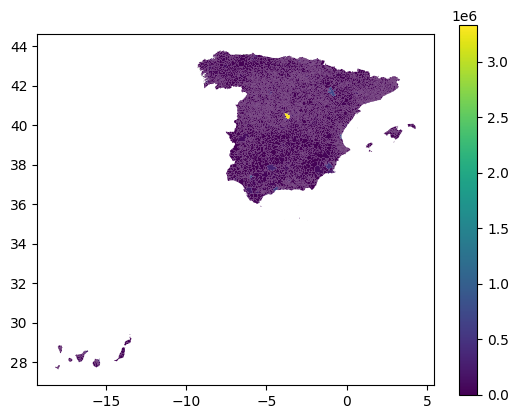

In [ ]:
mapa_c.plot("total_2023", legend=True)

<Axes: >

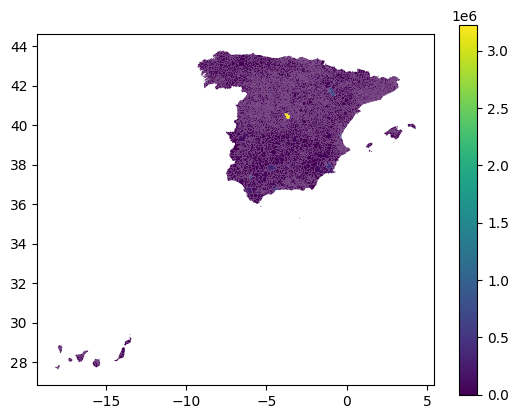

In [ ]:
mapa_c.plot("total_2018", legend=True)

<Axes: >

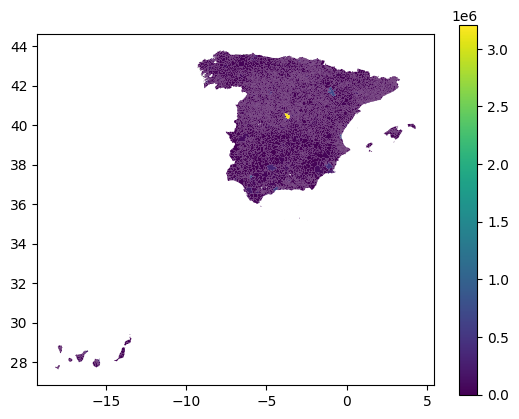

In [ ]:
mapa_c.plot("total_2013", legend=True)

<Axes: >

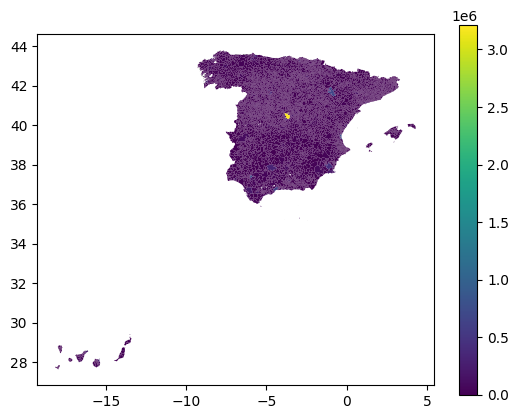

In [ ]:
mapa_c.plot("total_2008", legend=True)

<Axes: >

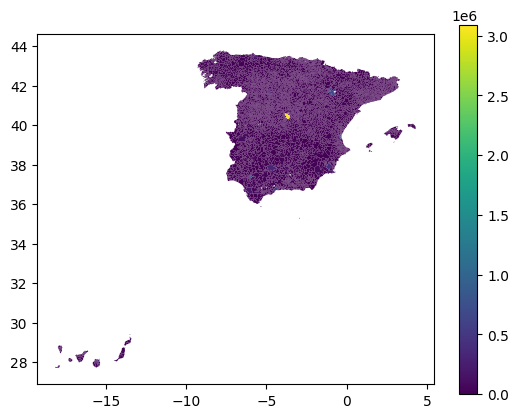

In [ ]:
mapa_c.plot("total_2003", legend=True)

<Axes: >

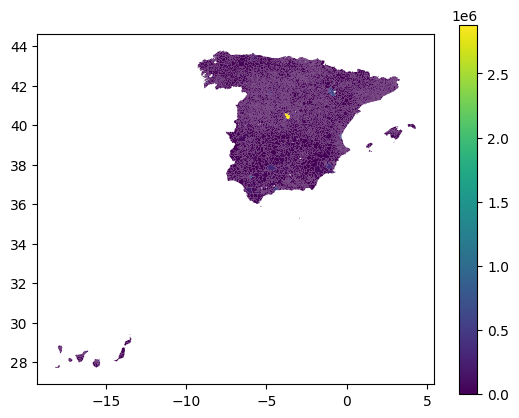

In [ ]:
mapa_c.plot("total_1998", legend=True)

<Axes: >

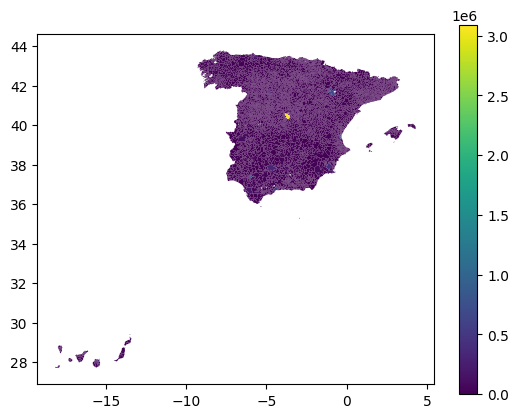

In [ ]:
mapa_c.plot("total_2003", legend=True)

In [ ]:
despoblado_2023_r = mapa_c[mapa_c['despoblado_2023'] == True]
print(despoblado_2023_r)

      codigo_provincia nombre_provincia CODIGOINE          nombre_municipio  \
0                   16           CUENCA     16266     Villarejo-Periesteban   
1                   16           CUENCA     16269          Villares del Saz   
2                   16           CUENCA     16270               Villarrubio   
3                   16           CUENCA     16271                  Villarta   
4                   16           CUENCA     16272      Villas de la Ventosa   
...                ...              ...       ...                       ...   
8157                 0              NaN     38007                Barlovento   
8164                 0              NaN     38014  Fuencaliente de la Palma   
8166                 0              NaN     38016                   Garafía   
8171                 0              NaN     38021                  Hermigua   
8202                 0              NaN     38052        Vilaflor de Chasna   

      mujeres_2023  hombres_2023  total_2023  despo

<Axes: >

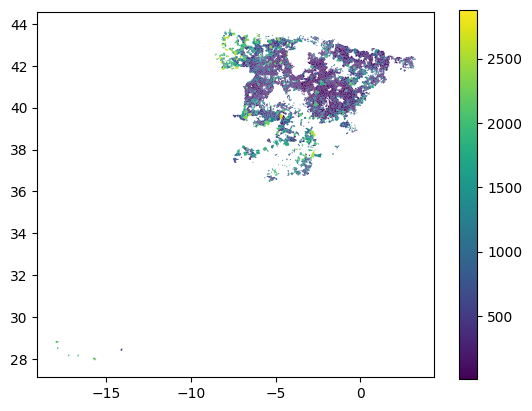

In [ ]:
despoblado_2023_r.plot("total_2003", legend=True)

buen ejemplo

https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b


In [ ]:
uploaded = files.upload()

Saving ne_50m_ocean.zip to ne_50m_ocean.zip


In [ ]:
import fiona

In [ ]:
map_oceanos = gpd.read_file(io.BytesIO(uploaded.get('ne_50m_ocean.zip')))

<Figure size 640x480 with 0 Axes>

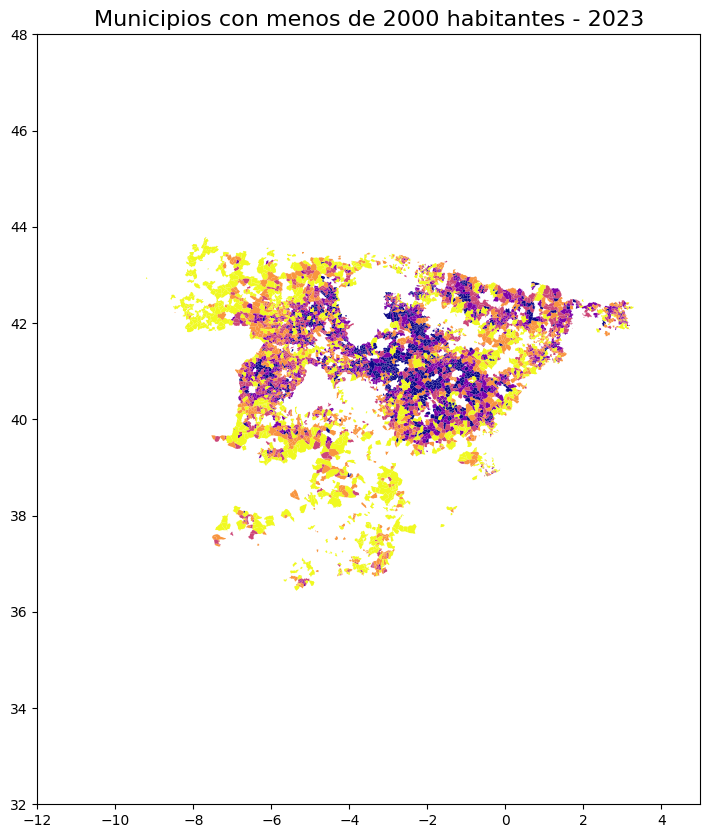

In [ ]:
despoblado_2023_r.plot(column='total_2003',scheme="quantiles",figsize=(25,10),cmap='plasma')
plt.xlim(-10,5)
plt.ylim(36,44)
plt.title('Municipios con menos de 2000 habitantes - 2023',fontsize=16)
plt.show()

<Axes: title={'center': '2023 - Municipios con menos de 2000 habitantes'}, xlabel='Longitud', ylabel='Latitud'>

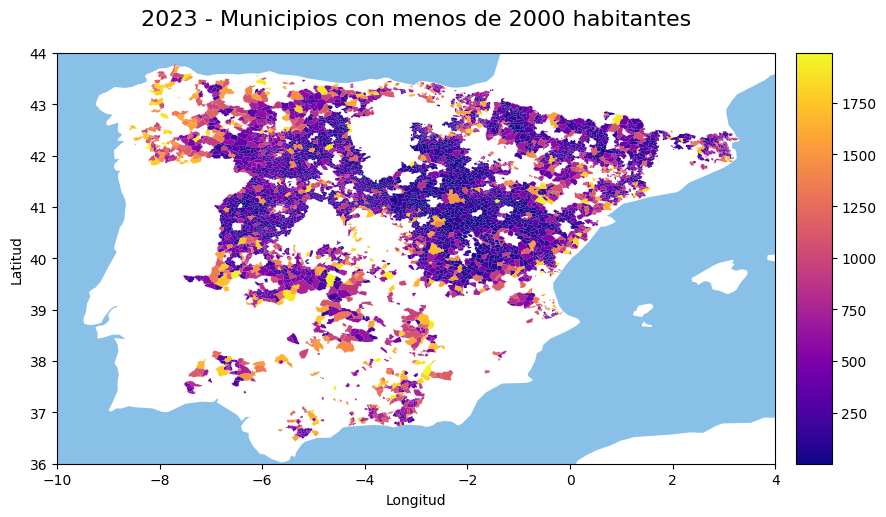

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Control del encuadre (área geográfica) del mapa
ax.axis([-10, 4, 36, 44])

# Control del título y los ejes
ax.set_title('2023 - Municipios con menos de 2000 habitantes',
             pad = 20,
             fontdict={'fontsize':16})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

# Generar y cargar el mapa
despoblado_2023_r.plot(column='total_2023', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)

# Cargar un mapa base con contornos de países
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

In [ ]:
poblado_2023_r = mapa_c[mapa_c['despoblado_2023'] == False]

<Axes: title={'center': '2023 - Municipios con más de 2000 habitantes'}, xlabel='Longitud', ylabel='Latitud'>

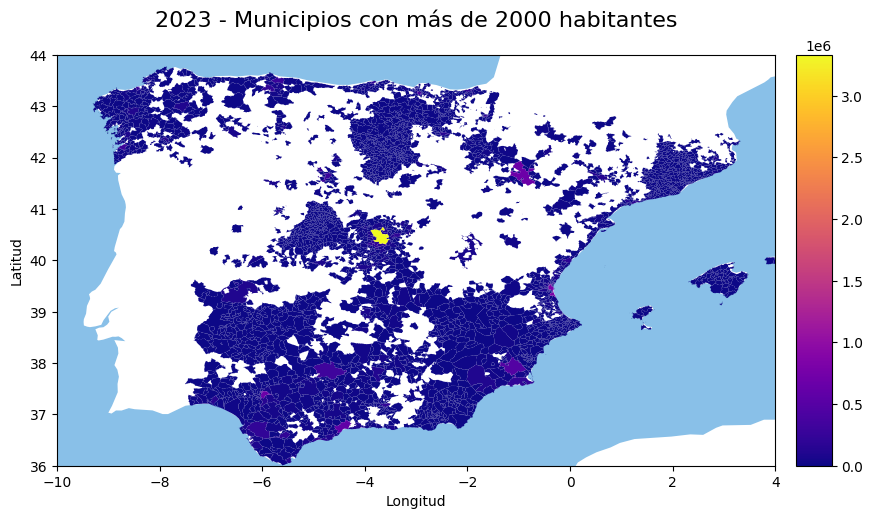

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Control del encuadre (área geográfica) del mapa
ax.axis([-10, 4, 36, 44])

# Control del título y los ejes
ax.set_title('2023 - Municipios con más de 2000 habitantes',
             pad = 20,
             fontdict={'fontsize':16})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

# Generar y cargar el mapa
poblado_2023_r.plot(column='total_2023', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)

# Cargar un mapa base con contornos de países
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

In [ ]:
mapa_c.explore("total_2023", legend=True)

# Subo el geojson y hago algunas pruebas con los mapas

In [ ]:
import io
import pandas as pd
from google.colab import files
import re

In [ ]:
import geopandas as gpd
!pip install mapclassify
import matplotlib.pyplot as plt
from mapclassify import classify

In [ ]:
uploaded = files.upload()

Saving poblacion_por_municipio_sexo_pib_y_geometry.geojson to poblacion_por_municipio_sexo_pib_y_geometry.geojson


In [ ]:
mapa = gpd.read_file(io.BytesIO(uploaded.get('poblacion_por_municipio_sexo_pib_y_geometry.geojson')))

In [ ]:
uploaded = files.upload()

Saving ne_50m_ocean.zip to ne_50m_ocean.zip


In [ ]:
map_oceanos = gpd.read_file(io.BytesIO(uploaded.get('ne_50m_ocean.zip')))

<Axes: title={'center': 'Poblacion por municipio - 2023'}, xlabel='Longitud', ylabel='Latitud'>

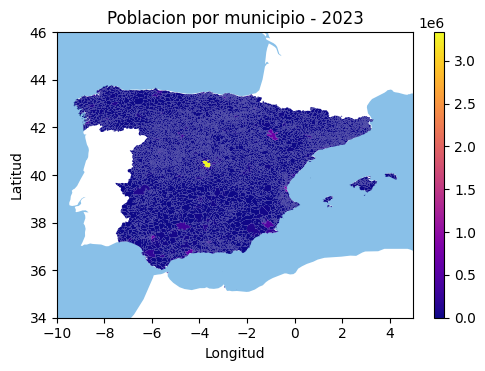

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Control del encuadre (área geográfica) del mapa
ax.axis([-10, 4, 36, 44])

# Control del título y los ejes
ax.set_title('Poblacion por municipio - 2023',
             fontdict={'fontsize':12})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)

# Generar y cargar el mapa
mapa.plot(column='total_2023', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=1)

# Cargar un mapa base con contornos de países
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

In [ ]:
despoblado_2023_r = mapa_c[mapa_c['despoblado_2023'] == True]
despoblado_2018_r = mapa_c[mapa_c['despoblado_2018'] == True]
despoblado_2013_r = mapa_c[mapa_c['despoblado_2013'] == True]
despoblado_2008_r = mapa_c[mapa_c['despoblado_2008'] == True]
despoblado_2003_r = mapa_c[mapa_c['despoblado_2003'] == True]
despoblado_1998_r = mapa_c[mapa_c['despoblado_1998'] == True]

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 2023'}, xlabel='Longitud', ylabel='Latitud'>

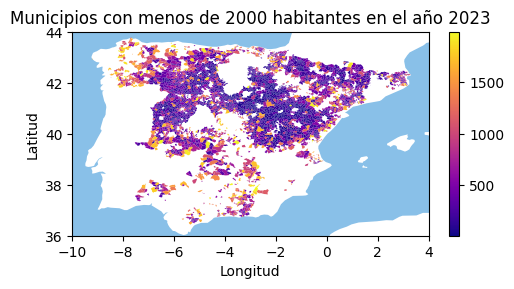

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, 4, 36, 44])
ax.set_title('Municipios con menos de 2000 habitantes en el año 2023')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_2023_r.plot(column='total_2023', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 2018'}, xlabel='Longitud', ylabel='Latitud'>

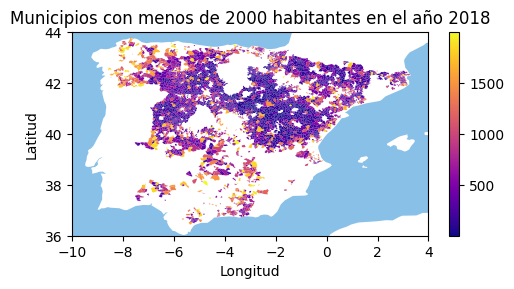

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, 4, 36, 44])
ax.set_title('Municipios con menos de 2000 habitantes en el año 2018')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_2018_r.plot(column='total_2018', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 2013'}, xlabel='Longitud', ylabel='Latitud'>

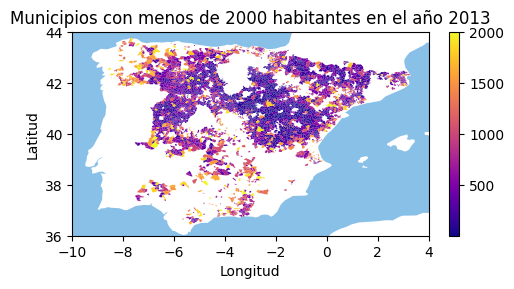

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, 4, 36, 44])
ax.set_title('Municipios con menos de 2000 habitantes en el año 2013')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_2013_r.plot(column='total_2013', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 2008'}, xlabel='Longitud', ylabel='Latitud'>

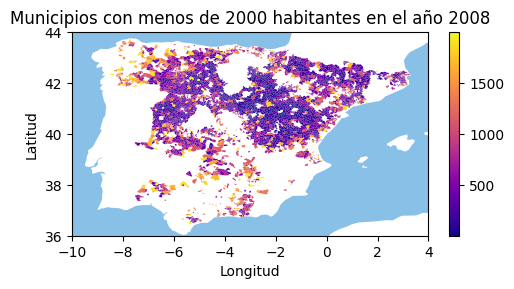

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, 4, 36, 44])
ax.set_title('Municipios con menos de 2000 habitantes en el año 2008')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_2008_r.plot(column='total_2008', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 2003'}, xlabel='Longitud', ylabel='Latitud'>

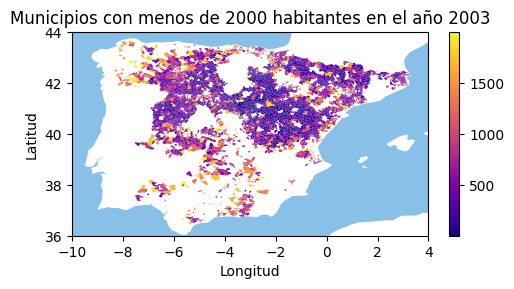

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, 4, 36, 44])
ax.set_title('Municipios con menos de 2000 habitantes en el año 2003')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_2003_r.plot(column='total_2003', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 1998'}, xlabel='Longitud', ylabel='Latitud'>

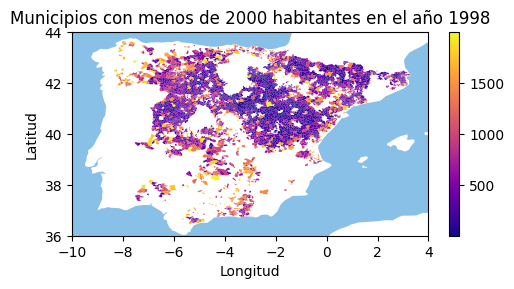

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, 4, 36, 44])
ax.set_title('Municipios con menos de 2000 habitantes en el año 1998')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_1998_r.plot(column='total_1998', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 2023'}, xlabel='Longitud', ylabel='Latitud'>

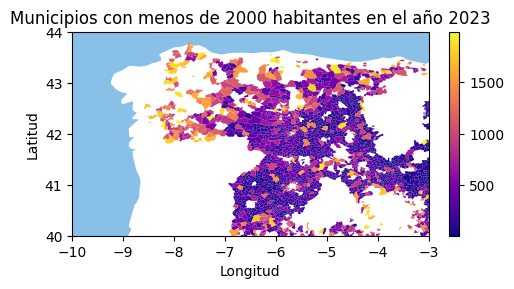

In [ ]:
# 2023 - 1er cuadrante
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, -3, 40, 44])
ax.set_title('Municipios con menos de 2000 habitantes en el año 2023')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_2023_r.plot(column='total_2023', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 1998'}, xlabel='Longitud', ylabel='Latitud'>

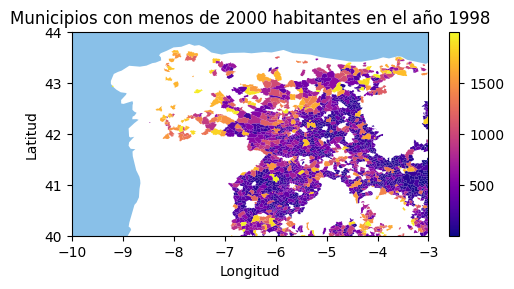

In [ ]:
## 1998 - 1er cuadrante
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, -3, 40, 44])
ax.set_title('Municipios con menos de 2000 habitantes en el año 1998')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_1998_r.plot(column='total_1998', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 2023'}, xlabel='Longitud', ylabel='Latitud'>

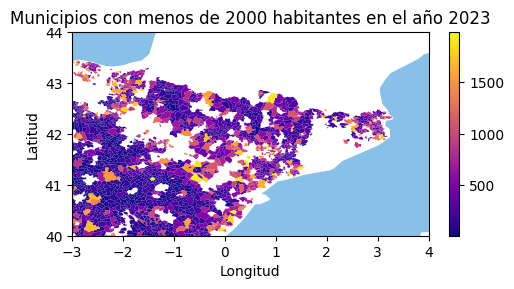

In [ ]:
# 2023 - 2do cuadrante
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-3, 4, 40, 44])
ax.set_title('Municipios con menos de 2000 habitantes en el año 2023')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_2023_r.plot(column='total_2023', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 1998'}, xlabel='Longitud', ylabel='Latitud'>

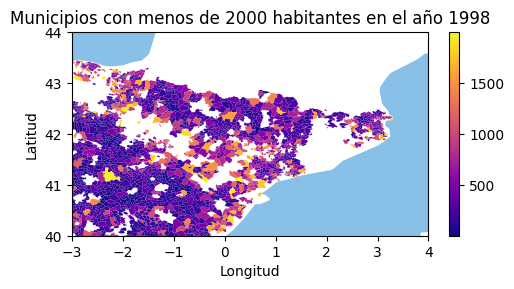

In [ ]:
# 1998 - 2do cuadrante
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-3, 4, 40, 44])
ax.set_title('Municipios con menos de 2000 habitantes en el año 1998')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_1998_r.plot(column='total_1998', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 2023'}, xlabel='Longitud', ylabel='Latitud'>

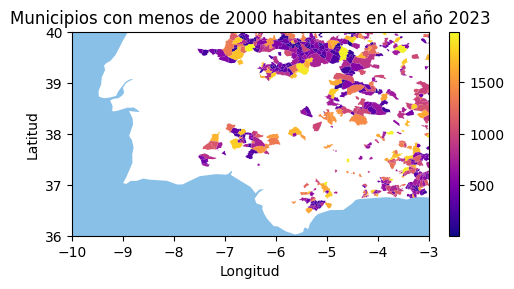

In [ ]:
# 2023 - 3er cuadrante
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, -3, 36, 40])
ax.set_title('Municipios con menos de 2000 habitantes en el año 2023')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_2023_r.plot(column='total_2023', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 1998'}, xlabel='Longitud', ylabel='Latitud'>

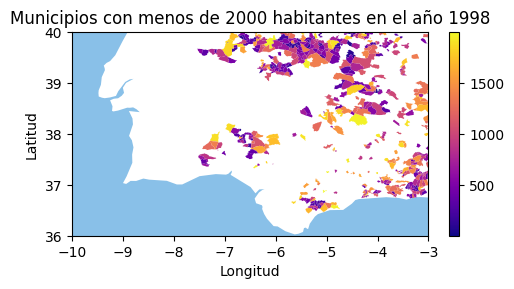

In [ ]:
# 1998 - 3er cuadrante
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, -3, 36, 40])
ax.set_title('Municipios con menos de 2000 habitantes en el año 1998')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_1998_r.plot(column='total_1998', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 2023'}, xlabel='Longitud', ylabel='Latitud'>

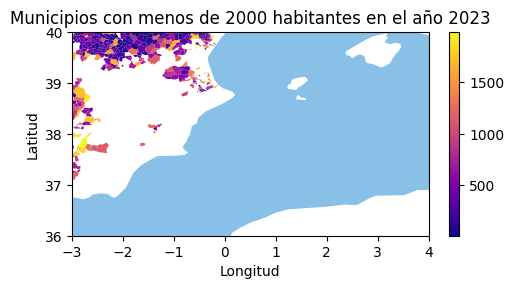

In [ ]:
# 2023 - 4to cuadrante
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-3, 4, 36, 40])
ax.set_title('Municipios con menos de 2000 habitantes en el año 2023')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_2023_r.plot(column='total_2023', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos de 2000 habitantes en el año 1998'}, xlabel='Longitud', ylabel='Latitud'>

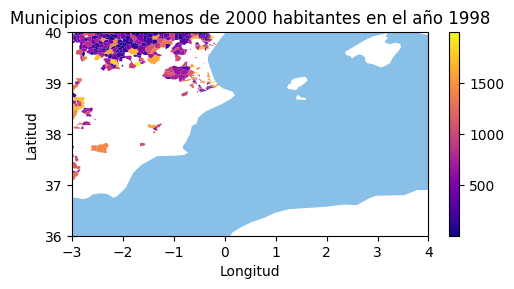

In [ ]:
# 1998 - 4to cuadrante
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-3, 4, 36, 40])
ax.set_title('Municipios con menos de 2000 habitantes en el año 1998')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
despoblado_1998_r.plot(column='total_1998', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)